# Modèles linéaires
*Aude Sportisse*

## Régression linéaire simple sur ozone

Références code: 
- https://inria.github.io/scikit-learn-mooc/python_scripts/linear_regression_in_sklearn.html

In [ ]:
!pip install pandas
!pip install seaborn
!pip install -U scikit-learn

In [6]:
#chargement des librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Le jeu de données ozone est composé de variables continues et catégorielles, dont
- MaxO3: valeur maximale d'ozone observée sur une journée ;
- T9, T12 et T15: températures prises à 9 h, 12 h et 15 h ;
- Ne9, Ne12, Ne15: nébulosités prises à 9 h, 12 h et 15 h ;
- Vx9, Vx12 et Vx15: composantes est-ouest du vent mesurées à 9 h, 12 h et 15 h ;
- MaxO3V: teneur maximale en ozone observée la veille ;
- vent: l'orientation du vent à 12 h ;
- pluie: la présence ou non de pluie.

In [41]:
ozone = pd.read_csv('ozone.txt', sep=";", decimal=',') #on charge le jeu de données

ozone = ozone.drop(['obs'], axis=1) #on supprime la variable qui indiquait le numéro de la données dans le tableau

In [42]:
#on enlève dans l'entrainement une donnée, ce sera la "nouvelle donnée", celle que l'on veut prédire 

ozone_test = ozone.iloc[[0],:] #notre jeu de données de test

ozone = ozone.drop([0], axis=0)

In [43]:
ozone.head() #on affiche le jeu de données

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie
1,82,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87,Nord,Sec
2,92,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82,Est,Sec
3,114,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92,Nord,Sec
4,94,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114,Ouest,Sec
5,80,17.7,19.8,18.3,6,6,7,-5.6382,-5.0000,-6.0000,94,Ouest,Pluie


In [44]:
ozone_test

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie
0,87,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84,Nord,Sec


On voudrait prédire le maximum d'ozone observé sur la journée (variable **MaxO3**) en fonction de la température à 12h (variable **T12**). Regardons d'abord graphiquement le lien entre les deux variables.

''

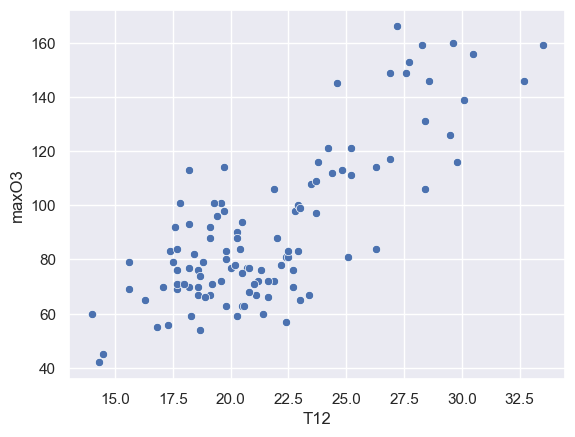

In [45]:
ax = sns.scatterplot(x="T12", y="maxO3", data=ozone)

;

In [46]:
from sklearn.linear_model import LinearRegression

feature_name = "T12"
target_name = "maxO3"
data, target = ozone[[feature_name]], ozone[target_name]
new_data, new_target = ozone_test[[feature_name]], ozone_test[target_name]

linear_regression = LinearRegression()
linear_regression.fit(data, target)


LinearRegression()

In [47]:
weight = linear_regression.coef_[0]

intercept = linear_regression.intercept_

print(weight)

print(intercept)

5.491107842071226
-28.022301911309967


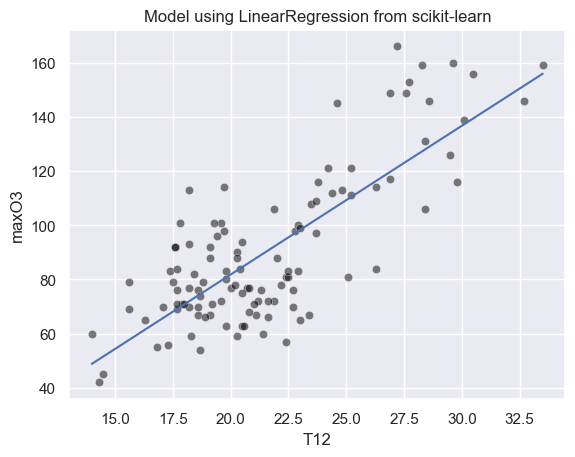

In [64]:
range_for_plot = np.linspace(data.min(), data.max(), num=300)
predicted_data = (weight * range_for_plot + intercept)

sns.scatterplot(x=data[feature_name], y=target, color="black", alpha=0.5)
plt.plot(range_for_plot,predicted_data)
_ = plt.title("Model using LinearRegression from scikit-learn")

Si on prédit une nouvelle données, elle sera sur la "ligne" prédite. 

In [59]:
#difficult to interpret

from sklearn.metrics import mean_squared_error

predicted_ozone = linear_regression.predict(new_data)
model_error = mean_squared_error(new_target, predicted_ozone)

print("L'erreur calculée est:", model_error) 

L'erreur calculée est: 180.54777786714828


In [60]:
print("La valeur prédite est:", predicted_ozone[0])
print("La vraie valeur est:", new_target[0])

La valeur prédite est: 73.56319316700771
La vraie valeur est: 87


In [61]:
#on peut recalculer "à la main" la mean squarred error (MSE):

mse_alamain = (predicted_ozone[0]-new_target[0])**2

print("L'erreur calculée est:", model_error) 

L'erreur calculée est: 180.54777786714828


La même chose peut être faite avec une régression multiple (en utilisant plus d'une seule variable pour prédire le maximum d'ozone).

## Régression logistique/classification sur iris

In [50]:
from sklearn import datasets

iris = datasets.load_iris() #on charge le jeu de données

data = pd.DataFrame(iris['data'],
                    columns=iris['feature_names'])


#ici on créé une colonne avec le nom des espèces:

species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')

data['species'] = species

In [53]:
data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [58]:
from sklearn.model_selection import train_test_split

X = iris['data']
y = iris['target']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=42)

In [89]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

/Users/asportis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
test_prediction = log_reg.predict(X_test)
test_prediction

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0,
       1, 2, 0, 1, 2, 0, 2, 2, 1])

In [92]:
# Matrice de confusion

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, test_prediction))

[[29  0  0]
 [ 0 23  0]
 [ 0  0 23]]
